<a href="https://colab.research.google.com/github/balams81/Rain/blob/master/lr_rain_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rainforecasting using Logistic Regression(Machine Learning Approach

Prof Balamurugan MS, VIT Chennai

********************************************************************
Datasets obtained from data.gov.in
********************************************************************

In [1]:
import sys, os

import os

sys.executable

os.getcwd()

'/content'

In [0]:
import warnings
warnings.filterwarnings("ignore")

We are going to use below mentioned libraries for **data import, processing and visulization**. As we progress, we will use other specific libraries for model building and evaluation. 

In [0]:
import pandas as pd 
import numpy as np
import seaborn as sn # visualization library based on matplotlib
import matplotlib.pylab as plt

#the output of plotting commands is displayed inline within Jupyter notebook
%matplotlib inline 


## Data Import and Manipulation

### Importing a data set


modify the ast_note_interactivity kernel option to see the value of multiple statements at once.

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
from google.colab import files
uploaded = files.upload()

Saving weche.csv to weche.csv


In [7]:
raw_df = pd.read_csv( "weche.csv", 
                        sep = ',', na_values = ['', ' '])

raw_df.columns = raw_df.columns.str.lower().str.replace(' ', '_')
raw_df.head()

,mint,maxt,rainfall,windd3,winds9,winds3,hum9,hum3,pres9,pres3,temp9,temp3,rain,riskmm,raint
0,13.4,22.9,0.6,WNW,20,24,71,22,1007.7,1007.1,16.9,21.8,No,0.0,No
1,7.4,25.1,0.0,WSW,4,22,44,25,1010.6,1007.8,17.2,24.3,No,0.0,No
2,12.9,25.7,0.0,WSW,19,26,38,30,1007.6,1008.7,21.0,23.2,No,0.0,No
3,9.2,28.0,0.0,E,11,9,45,16,1017.6,1012.8,18.1,26.5,No,1.0,No
4,17.5,32.3,1.0,NW,7,20,82,33,1010.8,1006.0,17.8,29.7,No,0.2,No



### 2. Structure of the dataset



In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123327 entries, 0 to 123326
Data columns (total 15 columns):
mint        123327 non-null float64
maxt        123327 non-null float64
rainfall    123327 non-null float64
windd3      123327 non-null object
winds9      123327 non-null int64
winds3      123327 non-null int64
hum9        123327 non-null int64
hum3        123327 non-null int64
pres9       123327 non-null float64
pres3       123327 non-null float64
temp9       123327 non-null float64
temp3       123327 non-null float64
rain        123327 non-null object
riskmm      123327 non-null float64
raint       123327 non-null object
dtypes: float64(8), int64(4), object(3)
memory usage: 14.1+ MB


In [9]:
raw_df.rain.value_counts()
raw_df.raint.value_counts()
#raw_df.describe(include='all').transpose()
raw_df.describe().transpose()

No     95856
Yes    27471
Name: rain, dtype: int64

No     96129
Yes    27198
Name: raint, dtype: int64

,count,mean,std,min,25%,50%,75%,max
mint,123327.0,12.429076,6.318240,-8.2,7.9,12.2,17.0,33.9
maxt,123327.0,23.443210,6.935242,2.6,18.1,22.8,28.4,48.1
rainfall,123327.0,2.333121,8.499454,0.0,0.0,0.0,0.6,371.0
winds9,123327.0,14.372943,8.802453,0.0,7.0,13.0,20.0,87.0
winds3,123327.0,19.178371,8.620379,2.0,13.0,19.0,24.0,87.0
hum9,123327.0,68.317408,18.993111,0.0,57.0,69.0,82.0,100.0
hum3,123327.0,51.119285,20.635445,0.0,36.0,52.0,65.0,100.0
pres9,123327.0,1017.652331,7.095307,980.5,1013.0,1017.7,1022.4,1041.0
pres3,123327.0,1015.261556,7.017461,977.1,1010.5,1015.3,1020.0,1039.6
temp9,123327.0,17.194383,6.396267,-3.1,12.4,16.8,21.7,40.2


### 2. Summarizing the dataset
Create a new data frame and store the raw data copy. This is being done to have a copy of the raw data intact for further manipulation if needed. The *dropna()* function is used for row wise deletion of missing value. The axis = 0 means row-wise, 1 means column wise.


In [10]:
filter_df = raw_df.dropna(axis=0, how='any', thresh=None, 
                             subset=None, inplace=False)

list(filter_df.columns )

['mint',
 'maxt',
 'rainfall',
 'windd3',
 'winds9',
 'winds3',
 'hum9',
 'hum3',
 'pres9',
 'pres3',
 'temp9',
 'temp3',
 'rain',
 'riskmm',
 'raint']

We will first start by printing the unique labels in categorical features

In [11]:
numerical_features = ['mint', 'maxt', 'winds9', 'winds3', 'hum9', 'hum3','pres9','pres3','temp9','temp3']

categorical_features = ['windd3','rain','raint']

for f in categorical_features:
    print("\nThe unique labels in {} is {}\n".format(f, filter_df[f].unique()))
    print("The values in {} is \n{}\n".format(f,  filter_df[f].value_counts()))



The unique labels in windd3 is ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']

The values in windd3 is 
SE     9004
S      8773
W      8661
WSW    8543
SSE    8375
SW     8357
N      7841
ESE    7598
E      7527
WNW    7506
NE     7282
SSW    7272
ENE    7050
NW     7045
NNW    6741
NNE    5752
Name: windd3, dtype: int64


The unique labels in rain is ['No' 'Yes']

The values in rain is 
No     95856
Yes    27471
Name: rain, dtype: int64


The unique labels in raint is ['No' 'Yes']

The values in raint is 
No     96129
Yes    27198
Name: raint, dtype: int64



We will use **groupby** function of pandas to get deeper insights. We will write a generic function to report the mean by any categorical variable.

In [0]:
def group_by (categorical_features):
    return filter_df.groupby(categorical_features).mean()



In [13]:
group_by("rain")
group_by("raint")
group_by("windd3")

,mint,maxt,rainfall,winds9,winds3,hum9,hum3,pres9,pres3,temp9,temp3,riskmm
rain,,,,,,,,,,,,
No,12.237189,24.309845,0.074316,13.874875,18.776373,64.675440,46.925785,1018.374121,1015.663809,17.532003,22.802098,1.299142
Yes,13.098639,20.419213,10.214888,16.110881,20.581086,81.025518,65.751884,1015.133752,1013.857954,16.016308,18.895148,5.767056


,mint,maxt,rainfall,winds9,winds3,hum9,hum3,pres9,pres3,temp9,temp3,riskmm
raint,,,,,,,,,,,,
No,12.140642,24.035066,1.262518,13.930354,18.745311,65.684133,46.199295,1018.584473,1016.112203,17.280740,22.637360,0.073843
Yes,13.448522,21.351342,6.117075,15.937238,20.708986,77.624494,68.508567,1014.357754,1012.255015,16.889161,19.438183,10.142617


,mint,maxt,rainfall,winds9,winds3,hum9,hum3,pres9,pres3,temp9,temp3,riskmm
windd3,,,,,,,,,,,,
E,14.250352,25.243404,1.964674,13.916567,17.676631,67.209911,50.792082,1019.536535,1016.554816,19.030796,23.865391,2.212289
ENE,15.608128,26.550355,2.003504,13.027518,18.133617,65.997589,51.877305,1018.356440,1015.107163,20.683404,25.087702,2.505688
ESE,13.963675,24.848355,2.136510,14.521321,17.911161,65.810740,50.320347,1019.492024,1016.775428,18.767373,23.389839,2.254778
N,11.307512,23.534689,1.465209,15.222931,19.265782,69.317562,49.810993,1017.667326,1013.941086,16.340684,22.162530,2.786086
NE,14.805617,25.760368,1.526215,11.856083,18.594754,67.847981,54.468965,1018.500508,1014.939670,19.883851,24.218553,2.234098
NNE,13.268255,24.957284,1.564760,13.439673,17.792072,68.193672,52.525035,1018.334736,1014.559962,18.425748,23.458223,2.839239
NNW,10.522816,23.235306,1.693710,13.101172,18.415665,70.004895,48.053256,1016.688340,1013.272422,15.612832,21.913396,2.673921
NW,10.767665,23.184216,2.218737,13.512136,19.803974,68.668843,47.417601,1015.250987,1012.274223,15.919262,21.795884,2.594961
S,12.047190,21.675653,2.948433,15.756868,19.516699,70.796535,55.184429,1019.373635,1017.946609,16.030993,20.080953,2.389673


## Model Building

### Dummy Variable coding

Remove the response variable from the dataset¶


In [14]:
list(filter_df.columns)

['mint',
 'maxt',
 'rainfall',
 'windd3',
 'winds9',
 'winds3',
 'hum9',
 'hum3',
 'pres9',
 'pres3',
 'temp9',
 'temp3',
 'rain',
 'riskmm',
 'raint']

In [0]:
X_features = list(filter_df.columns)
X_features.remove('rainfall')
X_features.remove('riskmm')
X_features.remove('raint')

In [16]:
X_features

['mint',
 'maxt',
 'windd3',
 'winds9',
 'winds3',
 'hum9',
 'hum3',
 'pres9',
 'pres3',
 'temp9',
 'temp3',
 'rain']

In [0]:
categorical_features = ['windd3','rain']

In [0]:
#for i in categorical_features:
 #   if filter_df.dtypes.name = 'category'
encoded_X_df = pd.get_dummies( filter_df[X_features], columns = categorical_features, drop_first = True )

encoded_Y_df = pd.get_dummies( filter_df['raint'], drop_first=False)

In [19]:
encoded_Y_df.head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [20]:
pd.options.display.max_columns = None
encoded_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123327 entries, 0 to 123326
Data columns (total 26 columns):
mint          123327 non-null float64
maxt          123327 non-null float64
winds9        123327 non-null int64
winds3        123327 non-null int64
hum9          123327 non-null int64
hum3          123327 non-null int64
pres9         123327 non-null float64
pres3         123327 non-null float64
temp9         123327 non-null float64
temp3         123327 non-null float64
windd3_ENE    123327 non-null uint8
windd3_ESE    123327 non-null uint8
windd3_N      123327 non-null uint8
windd3_NE     123327 non-null uint8
windd3_NNE    123327 non-null uint8
windd3_NNW    123327 non-null uint8
windd3_NW     123327 non-null uint8
windd3_S      123327 non-null uint8
windd3_SE     123327 non-null uint8
windd3_SSE    123327 non-null uint8
windd3_SSW    123327 non-null uint8
windd3_SW     123327 non-null uint8
windd3_W      123327 non-null uint8
windd3_WNW    123327 non-null uint8
windd3_WSW   

In [21]:
Y = encoded_Y_df.filter(['Yes'], axis =1)
X = encoded_X_df
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123327 entries, 0 to 123326
Data columns (total 1 columns):
Yes    123327 non-null uint8
dtypes: uint8(1)
memory usage: 1.1 MB


### Correlation amongst variable

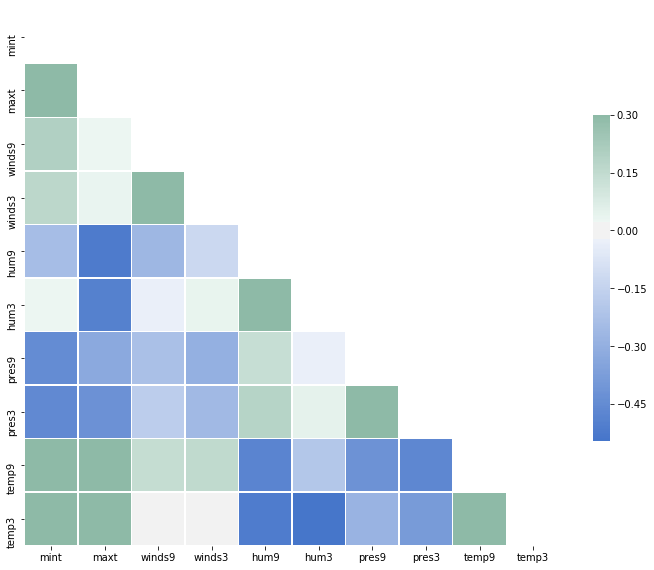

In [22]:
corr = filter_df.filter(numerical_features).corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(255, 150, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Train and test data split using Python

The train and test split can also be done using the **sklearn module**

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42)

In case there is class imbalance, the below code chunk can be used to remove the class imbalance before any algorithm is tried.

In [0]:
"""
In case there is class imbalance, the below code chunk can be used to remove the class 
imbalance before any algorithm is tried.
"""

#from imblearn.over_sampling import SMOTE

#os = SMOTE(random_state=42)

#columns = X_train.columns
#os_data_X,os_data_y=os.fit_sample(X_train, y_train)
#os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
#os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
#print("length of oversampled data is ",len(os_data_X))
#print("Number of negative class in oversampled data",len(os_data_y[os_data_y['y']==0]))
#print("Number of positive class",len(os_data_y[os_data_y['y']==1]))
#print("Proportion of negative class in the oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
#print("Proportion of positive class in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

## Model Building: Using the **sklearn** 



In [0]:
from sklearn import linear_model #linear_model, ensemble, neural_network, naive bayes, svm, tree
#dir(linear_model)

In [25]:
""" 
using the ravel function to convert the y_train which is a column vector to 
a flattened array. Being done as the function expects an array to be passed. 
"""
#linear_model.LogisticRegressionCV?

lg_reg_model = linear_model.LogisticRegression(penalty="l1", solver = 'liblinear' )

lg_reg_model.fit(X_train,y_train.values.ravel())

' \nusing the ravel function to convert the y_train which is a column vector to \na flattened array. Being done as the function expects an array to be passed. \n'

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

For more information on the solver parameter, refer:

> 1. LIBLINEAR – A Library for Large Linear Classification: https://www.csie.ntu.edu.tw/~cjlin/liblinear/
2. SAG – Mark Schmidt, Nicolas Le Roux, and Francis Bach
    Minimizing Finite Sums with the Stochastic Average Gradient https://hal.inria.fr/hal-00860051/document
3. SAGA – Defazio, A., Bach F. & Lacoste-Julien S. (2014).
    SAGA: A Fast Incremental Gradient Method With Support for Non-Strongly Convex Composite Objectives https://arxiv.org/abs/1407.0202
4. Hsiang-Fu Yu, Fang-Lan Huang, Chih-Jen Lin (2011). Dual coordinate descent
    methods for logistic regression and maximum entropy models. Machine Learning 85(1-2):41-75. https://www.csie.ntu.edu.tw/~cjlin/papers/maxent_dual.pdf


More on logisticRegression at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

## Model Evaluation


### The prediction on train data.

To predict the outcome on the **train set**
> * Use **predict** function of the model object 


In [26]:
# Make predictions using the testing set
#pd.options.display.max_rows = None

predict_class_train_df = pd.DataFrame(lg_reg_model.predict(X_train))
predict_class_train_df.head()

predict_porb_train_df = pd.DataFrame(lg_reg_model.predict_proba(X_train))
#predict_porb_train_df.iloc[:,:].head()


,0
0,0
1,0
2,0
3,0
4,0


### The prediction on test data.

The prediction can be carried out by **defining functions** as well. Below is one such instance wherein a function is defined and is used for prediction

In [0]:
def get_predictions ( test_class, model, test_data ):
    predicted_df = pd.DataFrame(model.predict_proba(test_data))
    y_pred_df = pd.concat([test_class.reset_index(drop=True), predicted_df.iloc[:,1:]], axis =1)
    return y_pred_df

Giving label to the Y column of the test set by using the dictionary data type in python. This is being done for the model which was built using dummy variable coding. It will be used to generate confusion matrix at a later time

In [0]:
test_series = y_test
train_series = y_train

raint_dict = {1:"Yes", 0:"No"}
class_test_df = test_series.replace(dict(Yes=raint_dict))
class_test_df.rename({'Yes': 'raint'}, axis='columns', inplace=True )

class_train_df = train_series.replace(dict(Yes=raint_dict))
class_train_df.rename({'Yes': 'raint'}, axis='columns', inplace=True )

#class_test_df.info()
#class_train_df.info()

In [29]:
predict_test_df = pd.DataFrame(get_predictions(class_test_df.raint, lg_reg_model, X_test))
predict_test_df.rename(columns = {1:'predicted_prob'}, inplace=True)
predict_test_df.head()

,raint,predicted_prob
0,Yes,0.754825
1,Yes,0.019299
2,No,0.278561
3,No,0.018520
4,No,0.062034


In [30]:
predict_test_df['predicted'] = predict_test_df.predicted_prob.map(lambda x: 'Yes' if x > 0.5 else 'No')
predict_test_df[0:10]

,raint,predicted_prob,predicted
0,Yes,0.754825,Yes
1,Yes,0.019299,No
2,No,0.278561,No
3,No,0.018520,No
4,No,0.062034,No
5,No,0.082491,No
6,No,0.104644,No
7,No,0.080312,No
8,No,0.055239,No
9,No,0.387660,No


### Confusion Matrix

We will built classification matrix using the **metrics** method from **sklearn** package. We will also write a custom function to build a classification matrix and use it for reporting the performance measures.

#### Confusion Matrix using sklearn

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [32]:
print("The model with dummy variable coding output: ")
confusion_matrix(class_test_df.raint, predict_test_df.predicted)
lg_reg_report = (classification_report(class_test_df, predict_test_df.predicted))
print(lg_reg_report)


The model with dummy variable coding output: 


array([[18196,   966],
       [ 2984,  2520]])

              precision    recall  f1-score   support

          No       0.86      0.95      0.90     19162
         Yes       0.72      0.46      0.56      5504

    accuracy                           0.84     24666
   macro avg       0.79      0.70      0.73     24666
weighted avg       0.83      0.84      0.83     24666



#### Confusion Matrix using generic function

In [0]:
def draw_cm( actual, predicted ):
    plt.figure(figsize=(9,9))
    cm = metrics.confusion_matrix( actual, predicted )
    sn.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["Yes", "No"] , 
               yticklabels = ["Yes", "No"],cmap = 'Blues_r')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Classification Matrix Plot', size = 15);
    plt.show()

The classification matrix plot as reported with dummy variable coding is:

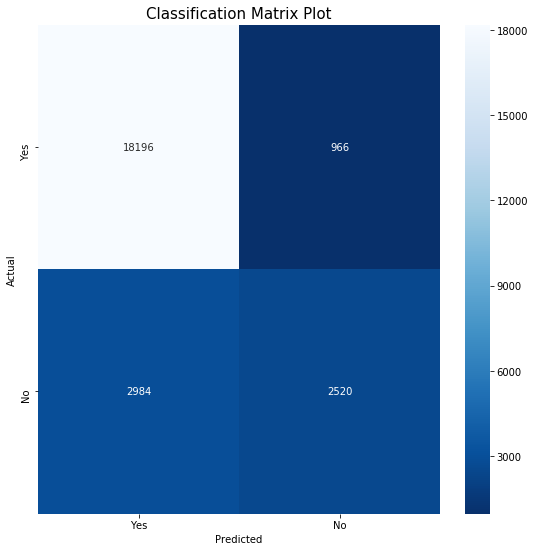

In [34]:
draw_cm( predict_test_df.raint, predict_test_df.predicted )

**Performance Measure on the test set**


In [0]:
def measure_performance (clasf_matrix):
    measure = pd.DataFrame({
                        'sensitivity': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)], 
                        'specificity': [round(clasf_matrix[1,1]/(clasf_matrix[1,0]+clasf_matrix[1,1]),2)],
                        'recall': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)],
                        'precision': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[1,0]),2)],
                        'overall_acc': [round((clasf_matrix[0,0]+clasf_matrix[1,1])/
                                              (clasf_matrix[0,0]+clasf_matrix[0,1]+clasf_matrix[1,0]+clasf_matrix[1,1]),2)]
                       })
    return measure

In [36]:
cm = metrics.confusion_matrix(predict_test_df.raint, predict_test_df.predicted)

lg_reg_metrics_df = pd.DataFrame(measure_performance(cm))
lg_reg_metrics_df

print( 'Total Accuracy sklearn: ',np.round( metrics.accuracy_score( class_test_df.raint, predict_test_df.predicted ), 2 ))



,sensitivity,specificity,recall,precision,overall_acc
0,0.95,0.46,0.95,0.86,0.84


Total Accuracy sklearn:  0.84
